In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('cleaned_data/gurgaon_properties_cleaned_v2.csv')

In [4]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,...,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,pareena laxmi apartments,sector 99a,0.30,5424.0,553.0,Super Built up area 553(51.38 sq.m.)Carpet are...,2,1,2,...,553.0,NaN,470.0,0,0,0,0,0,0,66
1,house,independent,sector 48,5.50,23504.0,2340.0,Plot area 260(217.39 sq.m.),4,4,2,...,NaN,2340.0,NaN,0,1,0,0,0,1,22
2,flat,green court,sector 90,0.47,6811.0,690.0,Carpet area: 690 (64.1 sq.m.),2,2,1,...,NaN,NaN,690.0,0,0,0,0,0,0,49
3,house,unitech uniworld resorts,sector 33,NaN,NaN,NaN,Plot area 520(434.79 sq.m.),5,8,3+,...,NaN,520.0,NaN,0,1,1,0,0,1,100
4,flat,signature global city 92,sector 92,0.78,11142.0,700.0,Super Built up area 1010(93.83 sq.m.)Carpet ar...,2,2,3,...,1010.0,NaN,700.0,0,0,0,0,1,0,24


In [5]:
df.shape

(3813, 23)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3813 entries, 0 to 3812
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   property_type        3813 non-null   object 
 1   society              3812 non-null   object 
 2   sector               3813 non-null   object 
 3   price                3795 non-null   float64
 4   price_per_sqft       3795 non-null   float64
 5   area                 3795 non-null   float64
 6   areaWithType         3813 non-null   object 
 7   bedRoom              3813 non-null   int64  
 8   bathroom             3813 non-null   int64  
 9   balcony              3813 non-null   object 
 10  floorNum             3794 non-null   float64
 11  facing               2705 non-null   object 
 12  agePossession        3813 non-null   object 
 13  super_built_up_area  1916 non-null   float64
 14  built_up_area        1741 non-null   float64
 15  carpet_area          1949 non-null   f

In [7]:
df.duplicated().sum()

126

In [8]:
df.drop_duplicates(inplace=True)

In [9]:
df.duplicated().sum()

0

In [10]:
df.shape

(3687, 23)

In [11]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,...,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,pareena laxmi apartments,sector 99a,0.30,5424.0,553.0,Super Built up area 553(51.38 sq.m.)Carpet are...,2,1,2,...,553.0,NaN,470.0,0,0,0,0,0,0,66
1,house,independent,sector 48,5.50,23504.0,2340.0,Plot area 260(217.39 sq.m.),4,4,2,...,NaN,2340.0,NaN,0,1,0,0,0,1,22
2,flat,green court,sector 90,0.47,6811.0,690.0,Carpet area: 690 (64.1 sq.m.),2,2,1,...,NaN,NaN,690.0,0,0,0,0,0,0,49
3,house,unitech uniworld resorts,sector 33,NaN,NaN,NaN,Plot area 520(434.79 sq.m.),5,8,3+,...,NaN,520.0,NaN,0,1,1,0,0,1,100
4,flat,signature global city 92,sector 92,0.78,11142.0,700.0,Super Built up area 1010(93.83 sq.m.)Carpet ar...,2,2,3,...,1010.0,NaN,700.0,0,0,0,0,1,0,24


### property_type

In [18]:
df['property_type'].isnull().sum()

0

<Axes: >

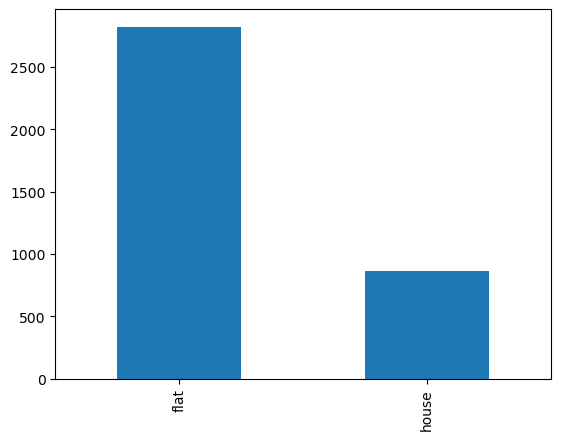

In [14]:
df['property_type'].value_counts().plot(kind='bar')

#### observations
- Flats are majority(75 percent) and there are less number of houses (~25percent)
- No missing values

### society

In [21]:
df['society'].value_counts().shape

(677,)

In [22]:
df['society'].value_counts()

independent                             492
tulip violet                             75
ss the leaf                              73
dlf new town heights                     42
shapoorji pallonji joyville gurugram     42
                                       ... 
ss omnia                                  1
sneh vihar                                1
madhur jeevan apartments                  1
radhakrishna society                      1
kamroon court                             1
Name: society, Length: 677, dtype: int64

In [29]:
df[df['society'] != 'independent']['society'].value_counts(normalize=True).cumsum().head(75)

tulip violet                            0.023482
ss the leaf                             0.046337
shapoorji pallonji joyville gurugram    0.059487
dlf new town heights                    0.072636
signature global park                   0.083594
                                          ...   
ansal heights 86                        0.489668
puri emerald bay                        0.493738
dlf the primus                          0.497808
mvn athens                              0.501565
central park flower valley              0.505322
Name: society, Length: 75, dtype: float64

In [32]:
society_counts = df['society'].value_counts()

frequency_bins = {
    'Very High (>100)' : (society_counts > 100).sum(),
    "High (50-100)": ((society_counts>=50) & (society_counts<=100)).sum(),
    "Average (10-49)": ((society_counts >= 10) & (society_counts < 50)).sum(),
    "Low (2-9)": ((society_counts > 1) & (society_counts < 10)).sum(),
    "Very Low (1)": (society_counts == 1).sum()
}
frequency_bins

{'Very High (>100)': 1,
 'High (50-100)': 2,
 'Average (10-49)': 92,
 'Low (2-9)': 275,
 'Very Low (1)': 307}

<Axes: >

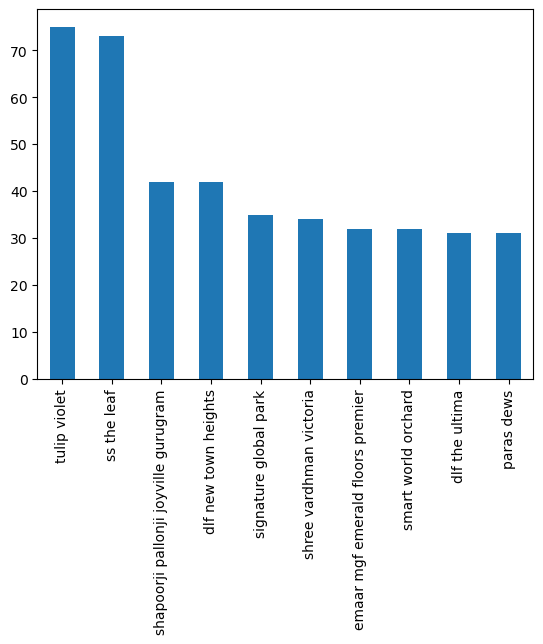

In [36]:
# Top 10 societies
df[df['society']!='independent']['society'].value_counts().head(10).plot(kind='bar')

In [37]:
df['society'].isnull().sum()

1

In [38]:
df[df['society'].isnull()]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,...,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
2627,flat,NaN,sector 78,0.6,3692.0,1625.0,Built Up area: 1625 (150.97 sq.m.),2,2,0,...,NaN,1625.0,NaN,0,0,0,0,0,0,0


### Observations
- There are 675 societies.
- The top 75 societies have 50 percent of the preperties and the rest 50 percent of the properties come under the remaining 600 societies
  - Very High (>100): Only 1 society has more than 100 listings.
  - High (50-100): 2 societies have between 50 to 100 listings.
  - Average (10-49): 92 societies fall in this range with 10 to 49 listings each.
  - Low (2-9): 273 societies have between 2 to 9 listings.
  - Very Low (1): A significant number, 308 societies, have only 1 listing.
- 1 missing value

### sector

In [40]:
df['sector'].value_counts()

sohna road    153
sector 85     108
sector 102    107
sector 92     100
sector 69      93
             ... 
sector 17a      3
sector 17b      3
sector 27       3
sector 73       3
sector 37       1
Name: sector, Length: 117, dtype: int64

In [41]:
df['sector'].value_counts().shape

(117,)

<Axes: >

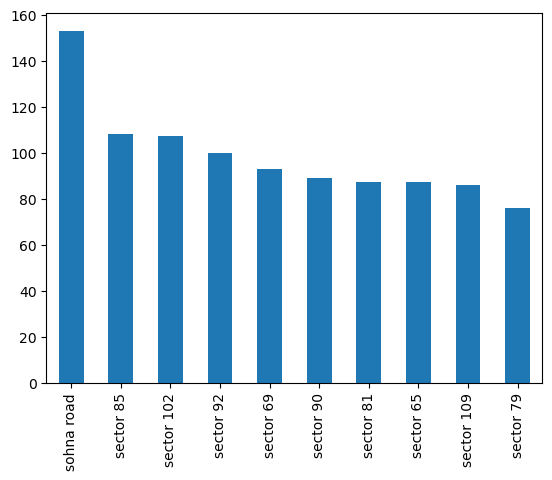

In [43]:
# Top 10 sectors
df['sector'].value_counts().head(10).plot(kind='bar')

In [44]:
# Frequency distribution for sectors
sector_counts = df['sector'].value_counts()

sector_frequency_bins = {
    "Very High (>100)": (sector_counts > 100).sum(),
    "High (50-100)": ((sector_counts >= 50) & (sector_counts <= 100)).sum(),
    "Average (10-49)": ((sector_counts >= 10) & (sector_counts < 50)).sum(),
    "Low (2-9)": ((sector_counts > 1) & (sector_counts < 10)).sum(),
    "Very Low (1)": (sector_counts == 1).sum()
}

sector_frequency_bins

{'Very High (>100)': 3,
 'High (50-100)': 26,
 'Average (10-49)': 64,
 'Low (2-9)': 23,
 'Very Low (1)': 1}

### Observations
- There are total 117 unique sectors in dataset
- Frequency distribution of sectors:
  - Very High (>100): 3 sectors have more than 100 listings.
  - High (50-100): 25 sectors have between 50 to 100 listings.
  - Average (10-49): A majority, 60 sectors, fall in this range with 10 to 49 listings each.
  - Low (2-9): 16 sectors have between 2 to 9 listings.
  - Very Low (1): Interestingly, there are no sectors with only 1 listing.

## Price

In [47]:
df['price'].isnull().sum()

17

In [48]:
df['price'].describe()

count    3670.000000
mean        2.535580
std         2.980966
min         0.070000
25%         0.950000
50%         1.520000
75%         2.750000
max        31.500000
Name: price, dtype: float64

<Axes: xlabel='price', ylabel='Count'>

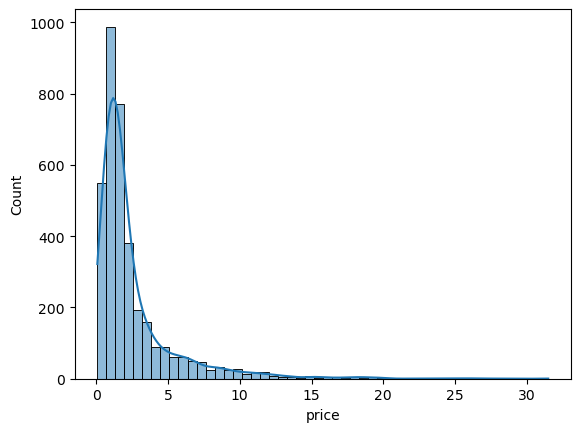

In [49]:
sns.histplot(df['price'], kde=True, bins=50)

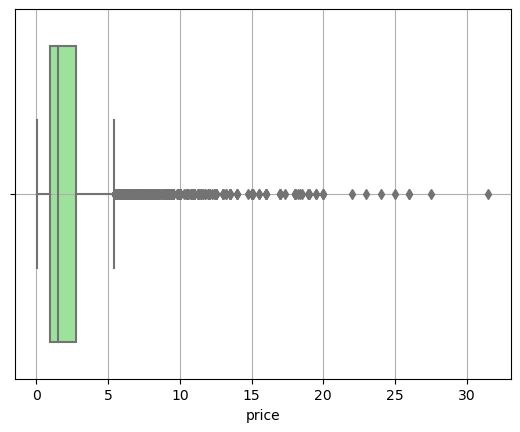

In [51]:
sns.boxplot(x=df['price'],color='lightgreen')
plt.grid()

### Observations
- Descriptive Statistics
  - Count: There are 3670 non-missing entries.
  - Mean Price: The average price is approximately 2.53 crores
  - Median Price: The median (50 percentile) price is 1.52 crors
  - Standard Deviation: The prices have standard deviation of 2.98, indicating in the variability in the prices.
  - Range: Prices range from a minimum of 0.07 crores to a maximum of 31.5 crores.
  - IQR: The interquartile range(difference between 75th and 25th percentile) is from 0.95 crores to 2.75 crores
- Visualizations:
  - Distribution: The histogram indicates that most properties are priced in the lower range (below 5 crores), with a few properties going beyond 10 crores.
  - Box Plot: The box plot showcases the spread of the data and potential outliers. Properties priced above approximately 10 crores might be considered outliers as they lie beyond the upper whisker of the box plot.
- Missing Values: There are 17 missing values in the price column.

In [53]:
# Skewness and Kurtosis
skewness = df['price'].skew()
kurtosis = df['price'].kurt()

print(skewness,kurtosis)

3.2722884813250888 14.880332378094538


In [54]:
# Quantile Analysis
quantiles = df['price'].quantile([0.01, 0.05, 0.95, 0.99])

quantiles

0.01     0.250
0.05     0.370
0.95     8.500
0.99    15.224
Name: price, dtype: float64

#### Quantile Analysis:

- 1% Quantile: Only 1% of properties are priced below 0.25 crores.
- 5% Quantile: 5% of properties are priced below 0.37 crores.
- 95% Quantile: 95% of properties are priced below 8.5 crores.
- 99% Quantile: 99% of properties are priced below 15.26 crores, indicating that very few properties are priced above this value.

In [56]:
# Identify potential outliers using IQR method
Q1 = df['price'].describe()['25%']
Q3 = df['price'].describe()['75%']
IQR = Q3 - Q1

IQR

1.8

In [57]:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(lower_bound, upper_bound)

-1.7500000000000002 5.45


In [59]:
outliers = df[(df['price'] < lower_bound) | (df['price'] > upper_bound)]
outliers.shape

(427, 23)

In [60]:
outliers['price'].describe()


count    427.000000
mean       9.232646
std        4.057071
min        5.460000
25%        6.480000
50%        8.000000
75%       10.655000
max       31.500000
Name: price, dtype: float64

#### Outliers Analysis (using IQR method):
- Based on the IQR method, there are 425 properties considered as outliers.
- These outliers have an average price of approximately 9.24 crores.
- The range for these outliers is from 5.46 crores to 31.5 crores.

<Axes: >

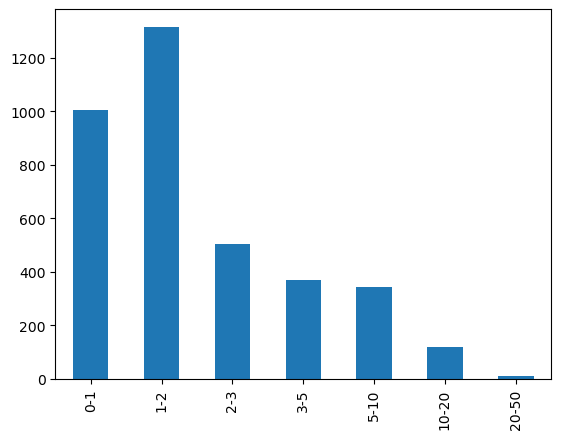

In [61]:
# price binning
bins = [0, 1, 2, 3, 5, 10, 20, 50]
bin_labels = ["0-1", "1-2", "2-3", "3-5", "5-10", "10-20", "20-50"]
pd.cut(df['price'], bins=bins, labels=bin_labels, right=False).value_counts().sort_index().plot(kind='bar')

- The majority of properties are priced in the "1-2 crores" and "2-3 crores" ranges.
- There's a significant drop in the number of properties priced above "5 crores."

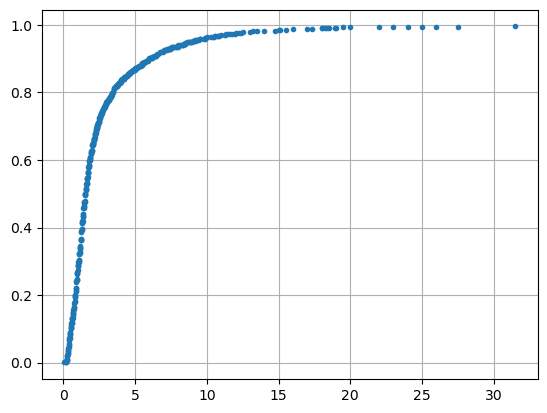

In [62]:
# ecdf plot
ecdf = df['price'].value_counts().sort_index().cumsum() / len(df['price'])
plt.plot(ecdf.index, ecdf, marker='.', linestyle='none')
plt.grid()

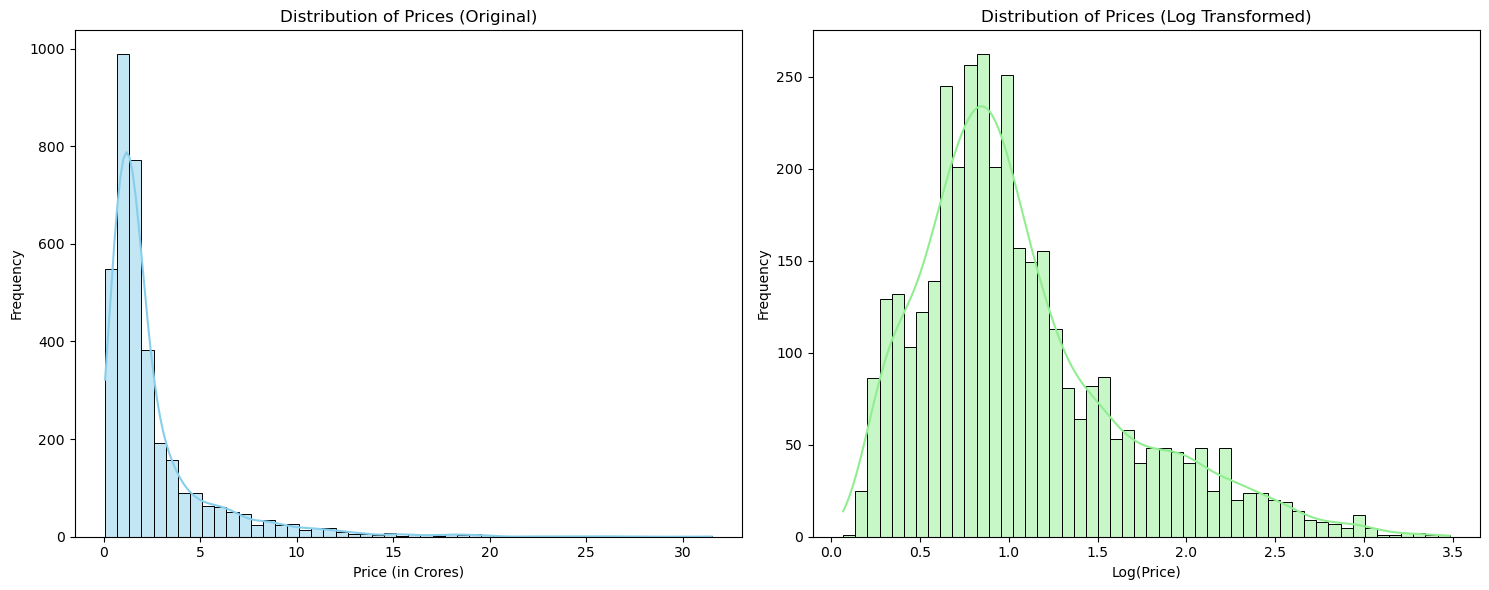

In [63]:
plt.figure(figsize=(15, 6))

# Distribution plot without log transformation
plt.subplot(1, 2, 1)
sns.histplot(df['price'], kde=True, bins=50, color='skyblue')
plt.title('Distribution of Prices (Original)')
plt.xlabel('Price (in Crores)')
plt.ylabel('Frequency')

# Distribution plot with log transformation
plt.subplot(1, 2, 2)
sns.histplot(np.log1p(df['price']), kde=True, bins=50, color='lightgreen')
plt.title('Distribution of Prices (Log Transformed)')
plt.xlabel('Log(Price)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

np.log1p(x): This function computes the natural logarithm of 1+x. It's designed to provide more accurate results for values of x that are very close to zero.

Using np.log1p helps in transforming the price column while ensuring that any value (including zero, if present) is handled appropriately. When we need to reverse the transformation, we can use np.expm1 which computes e^x-1

In [64]:
skewness = np.log1p(df['price']).skew()
kurtosis = np.log1p(df['price']).kurt()

print(skewness,kurtosis)

1.0717572084667024 0.9537347745836668


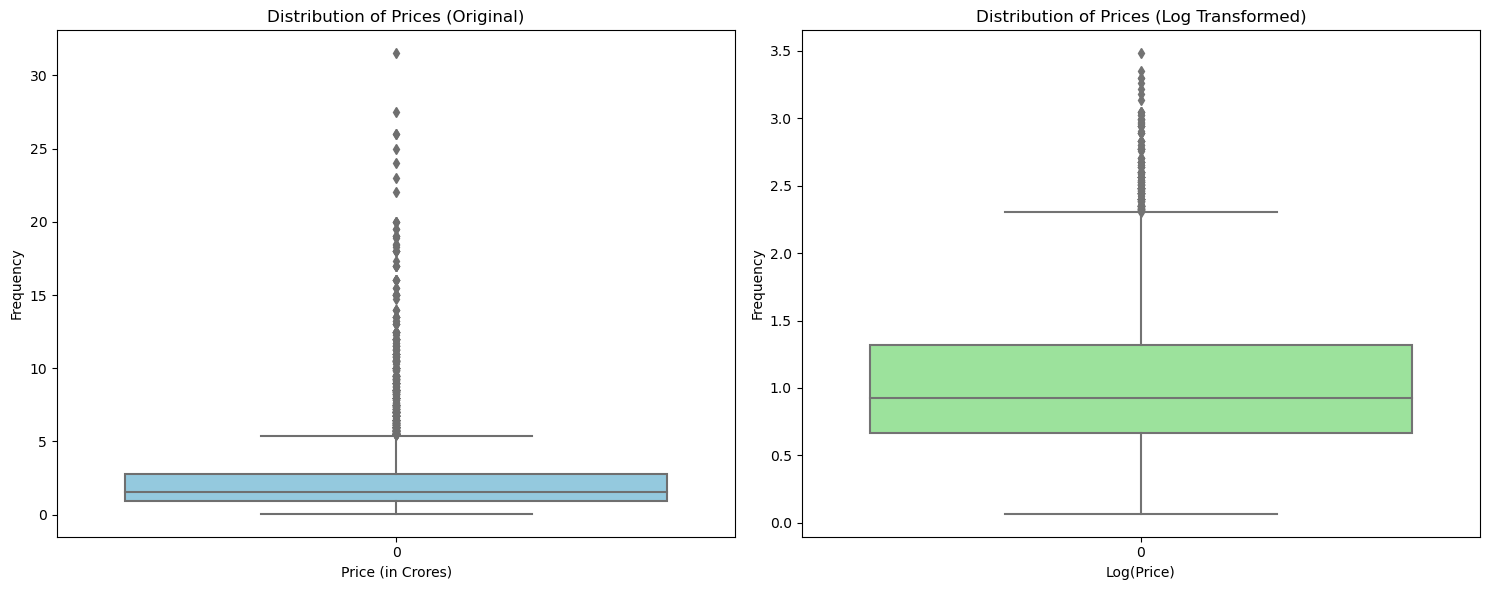

In [65]:
plt.figure(figsize=(15, 6))

# Distribution plot without log transformation
plt.subplot(1, 2, 1)
sns.boxplot(df['price'], color='skyblue')
plt.title('Distribution of Prices (Original)')
plt.xlabel('Price (in Crores)')
plt.ylabel('Frequency')

# Distribution plot with log transformation
plt.subplot(1, 2, 2)
sns.boxplot(np.log1p(df['price']), color='lightgreen')
plt.title('Distribution of Prices (Log Transformed)')
plt.xlabel('Log(Price)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

## price_per_sqft

In [66]:
df['price_per_sqft'].isnull().sum()

17

In [67]:
df['price_per_sqft'].describe()

count      3670.000000
mean      13923.954768
std       23250.124382
min           4.000000
25%        6815.750000
50%        9022.000000
75%       13888.750000
max      600000.000000
Name: price_per_sqft, dtype: float64

<Axes: xlabel='price_per_sqft', ylabel='Count'>

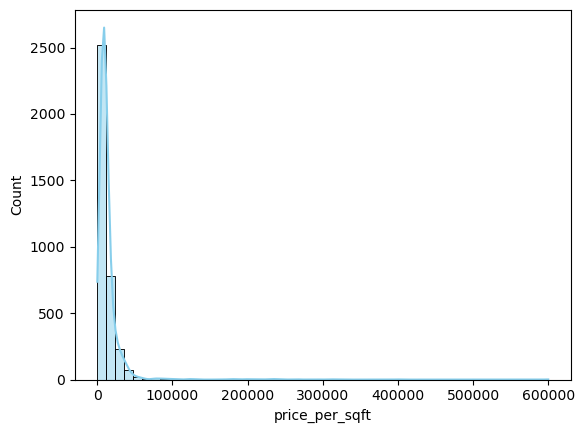

In [68]:
sns.histplot(df['price_per_sqft'],bins=50,color='skyblue',kde=True)

Most properties have a price_per_sqft ranging between approximately ₹0 and ₹40,000. There is a significant concentration in the lower range, with a few properties having exceptionally high price_per_sqft.

<Axes: >

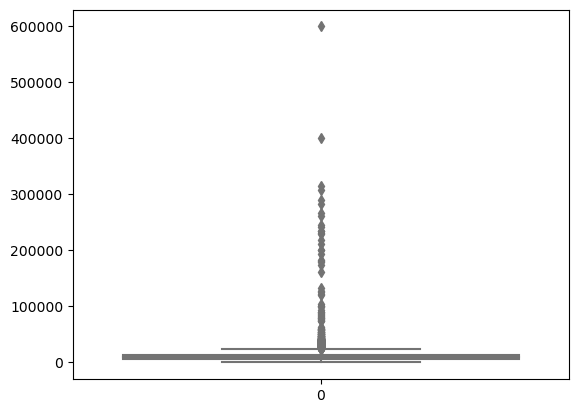

In [69]:
sns.boxplot(df['price_per_sqft'],color='lightgreen')

The box plot clearly shows several outliers, especially on the higher side. The interquartile range (IQR) is relatively compact, but there are many data points beyond the "whiskers" of the box plot, indicating potential outliers

### Observations
- Potential Outliers
- Right Skewed
- 17 missing values

## bedRoom

In [70]:
df['bedRoom'].isnull().sum()

0

<Axes: >

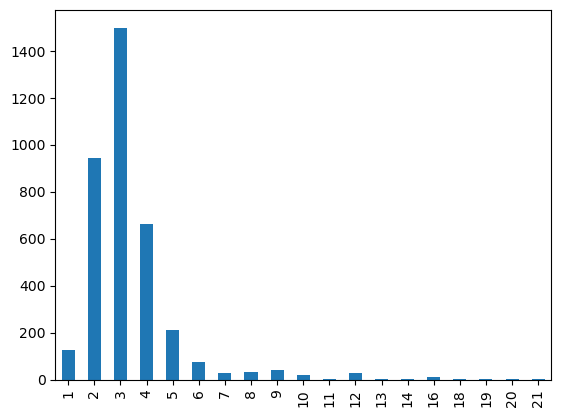

In [72]:
df['bedRoom'].value_counts().sort_index().plot(kind='bar')

<Axes: ylabel='bedRoom'>

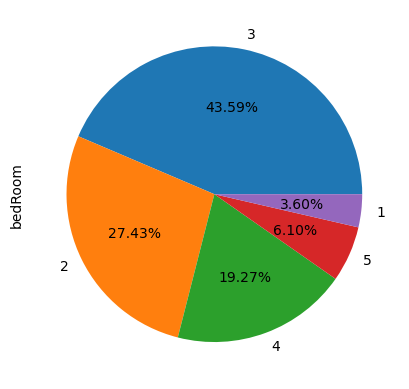

In [73]:
df['bedRoom'].value_counts(normalize=True).head().plot(kind='pie',autopct='%0.2f%%')

## bathroom

In [74]:
df['bathroom'].isnull().sum()

0

<Axes: >

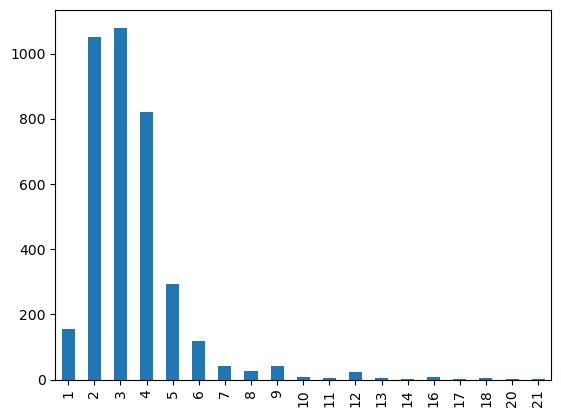

In [76]:
df['bathroom'].value_counts().sort_index().plot(kind='bar')

<Axes: ylabel='bathroom'>

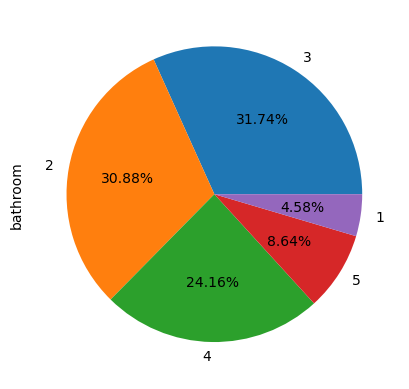

In [77]:
df['bathroom'].value_counts(normalize=True).head().plot(kind='pie',autopct='%0.2f%%')

In [78]:
df.columns

Index(['property_type', 'society', 'sector', 'price', 'price_per_sqft', 'area',
       'areaWithType', 'bedRoom', 'bathroom', 'balcony', 'floorNum', 'facing',
       'agePossession', 'super_built_up_area', 'built_up_area', 'carpet_area',
       'study room', 'servant room', 'store room', 'pooja room', 'others',
       'furnishing_type', 'luxury_score'],
      dtype='object')

## balcony

In [79]:
df['balcony'].isnull().sum()

0

<Axes: >

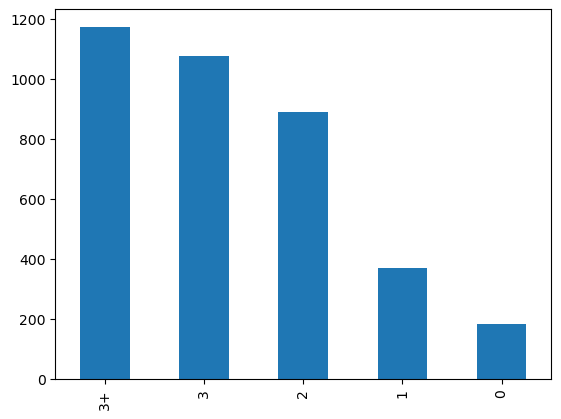

In [82]:
df['balcony'].value_counts().plot(kind='bar')

<Axes: ylabel='balcony'>

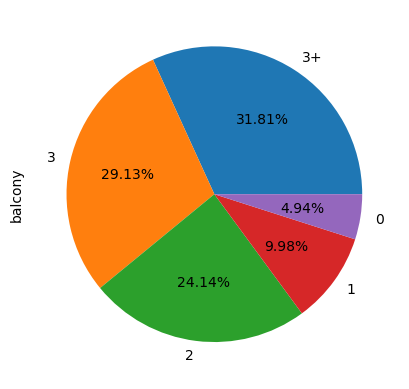

In [83]:
df['balcony'].value_counts(normalize=True).head().plot(kind='pie',autopct='%0.2f%%')

## floorNum

In [84]:
df['floorNum'].isnull().sum()

19

In [85]:
df['floorNum'].describe()

count    3668.000000
mean        6.784624
std         6.010214
min         0.000000
25%         2.000000
50%         5.000000
75%        10.000000
max        51.000000
Name: floorNum, dtype: float64

<Axes: >

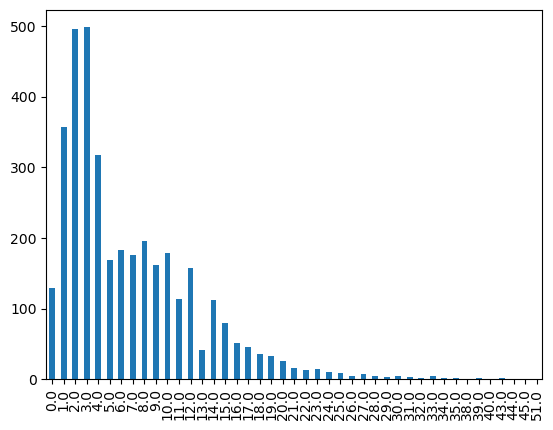

In [86]:
df['floorNum'].value_counts().sort_index().plot(kind='bar')

<Axes: >

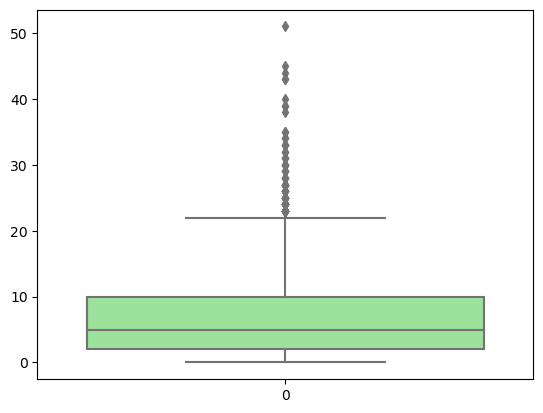

In [87]:
sns.boxplot(df['floorNum'], color='lightgreen')

- The majority of the properties lie between the ground floor(0) and the 25th floor
- Floors 1 to 4 are particularly common, with the 3rd florr being the most frequent.
- There are few properties located at higher floors, but their frequency is much lower.
- The box plot reveals that the majority of the properties are concentrated around the lower floors. The interquartile range (IQR) lies between approximately the 2nd and 10th floors.
- Data points beyond the "whiskers" of the box plot, especially on the higher side, indicate potential outliers.

## Facing

In [88]:
df['facing'].isnull().sum()

1048

In [89]:
df['facing'].fillna('NA',inplace=True)

In [90]:
df['facing'].value_counts()

NA            1048
North-East     627
East           624
North          389
West           249
South          231
North-West     193
South-East     173
South-West     153
Name: facing, dtype: int64

## agePossession

In [91]:
df['agePossession'].isnull().sum()

0

In [92]:
df['agePossession'].value_counts()

Relatively New        1646
New Property           595
Moderately Old         564
Undefined              309
Old Property           307
Under Construction     266
Name: agePossession, dtype: int64

## areas

In [93]:
# super built up area
df['super_built_up_area'].isnull().sum()

1811

In [94]:
df['super_built_up_area'].describe()

count     1876.000000
mean      1924.744430
std        764.266966
min         89.000000
25%       1478.750000
50%       1828.000000
75%       2215.000000
max      10000.000000
Name: super_built_up_area, dtype: float64

<Axes: xlabel='super_built_up_area', ylabel='Count'>

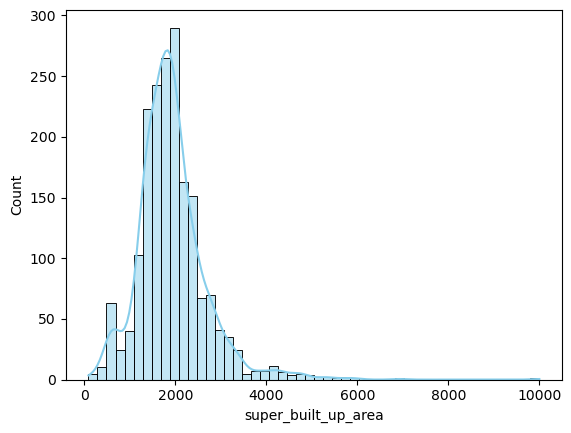

In [95]:
sns.histplot(df['super_built_up_area'].dropna(), bins=50, color='skyblue', kde=True)

<Axes: >

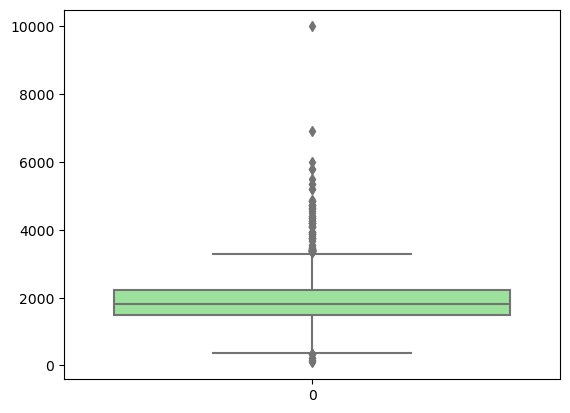

In [96]:
sns.boxplot(df['super_built_up_area'].dropna(), color='lightgreen')

- There are 1811 missing values
- Most properties have a super built-up area ranging between approximately 1,000 sq.ft and 2,500 sq.ft.
- There are a few properties with a significantly larger area, leading to a right-skewed distribution.
- The interquartile range (IQR) lies between roughly 1,480 sq.ft and 2,215 sq.ft, indicating that the middle 50% of the properties fall within this range.
- There are several data points beyond the upper "whisker" of the box plot, indicating potential outliers. These are properties with an unusually large super built-up area.

In [97]:
# built up area
df['built_up_area'].isnull().sum()

1989

In [98]:
df['built_up_area'].describe()

count      1698.000000
mean       2374.035058
std       17900.829587
min           2.000000
25%        1100.000000
50%        1650.000000
75%        2400.000000
max      737147.000000
Name: built_up_area, dtype: float64

<Axes: xlabel='built_up_area', ylabel='Count'>

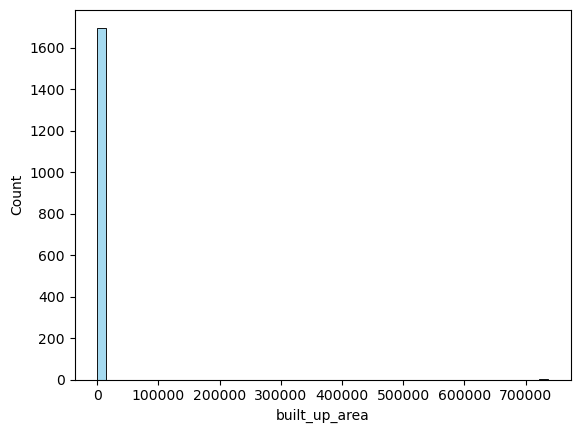

In [99]:
sns.histplot(df['built_up_area'].dropna(), bins=50, color='skyblue', kde=False)

<Axes: >

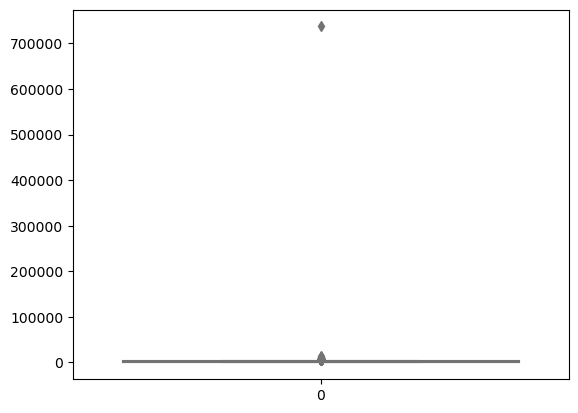

In [101]:
sns.boxplot(df['built_up_area'], color='lightgreen')